In [36]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

sys.path.append('../')
sys.path.append('../linearbpdesign/')
sys.path.append('../script/')
from linearbpdesign.sampler import Sampler as LinearSampler
from linearbpdesign.designBP import ssrandom, isSeparable, ssparse, dbn_to_tree
from script.structure_info import deg_of_ss, min_helix_length_of_ss

This notebook generates the resulting figures from uniforly sampled structures

# Load Results

In [59]:
dfCount = pd.read_csv('../results/immediate_150_count.csv', sep='\t')
dfCount

,ss,seed,unique,Min Helix,Generation
0,............((((((((...((((........(((.((((......,linearbp,920,1,MFE
1,.(((..((.....((((((((((((..............((((((....,linearbp,823,1,MFE
2,(((((((((.......)))))).)))....(((((.((.(((((((...,linearbp,0,1,MFE
3,.(((...(((...(((((((..((.(.((....)).))).))))))...,linearbp,815,1,MFE
4,..........((((...((..((((((.((.((.(.(....).).....,linearbp,0,1,MFE
...,...,...,...,...,...
11995,...(((.(((..((((...(((..(((..((((....))))))).....,bpenergy,162,3,Uniform
11996,..(((....(((......)))....)))...(((...((((...))...,bpenergy,12,3,Uniform
11997,.((((....(((((((...)))..))))........(((((........,bpenergy,416,3,Uniform
11998,((((...))))((((.((((((((((.(((.(((...)))(((..(...,bpenergy,6,3,Uniform


## Brief Stats

In [18]:
dfCount[dfCount['unique']==0].value_counts(['seed', 'Min Helix'], sort=False)

seed            Min Helix
bpenergy        1            185
                2              1
                3             64
linearbp        1            471
                2              5
                3             21
linearbp_onlyA  1            463
                2              6
                3             48
uniform         1            682
                2            253
                3            985
Name: count, dtype: int64

In [19]:
print('# Solved instance:', len(dfCount[(dfCount['seed']=='linearbp')&(dfCount['unique']>0)]))
print('# Solved instance:', len(dfCount[(dfCount['seed']=='linearbp')&(dfCount['unique']>500)]))
print('# Solved instance:', len(dfCount[(dfCount['seed']=='linearbp')&(dfCount['unique']>1000)]))

# Solved instance: 2503
# Solved instance: 1424
# Solved instance: 815


In [74]:
# Uniform
print('# Solved instance:', len(dfCount[(dfCount['seed']=='uniform')&(dfCount['unique']>0)]))
print('# 0 or 1 solutions:', len(dfCount[(dfCount['seed']=='uniform')&(dfCount['unique']<=1)]))

# Solved instance: 1080
# 0 or 1 solutions: 2185


# Plot

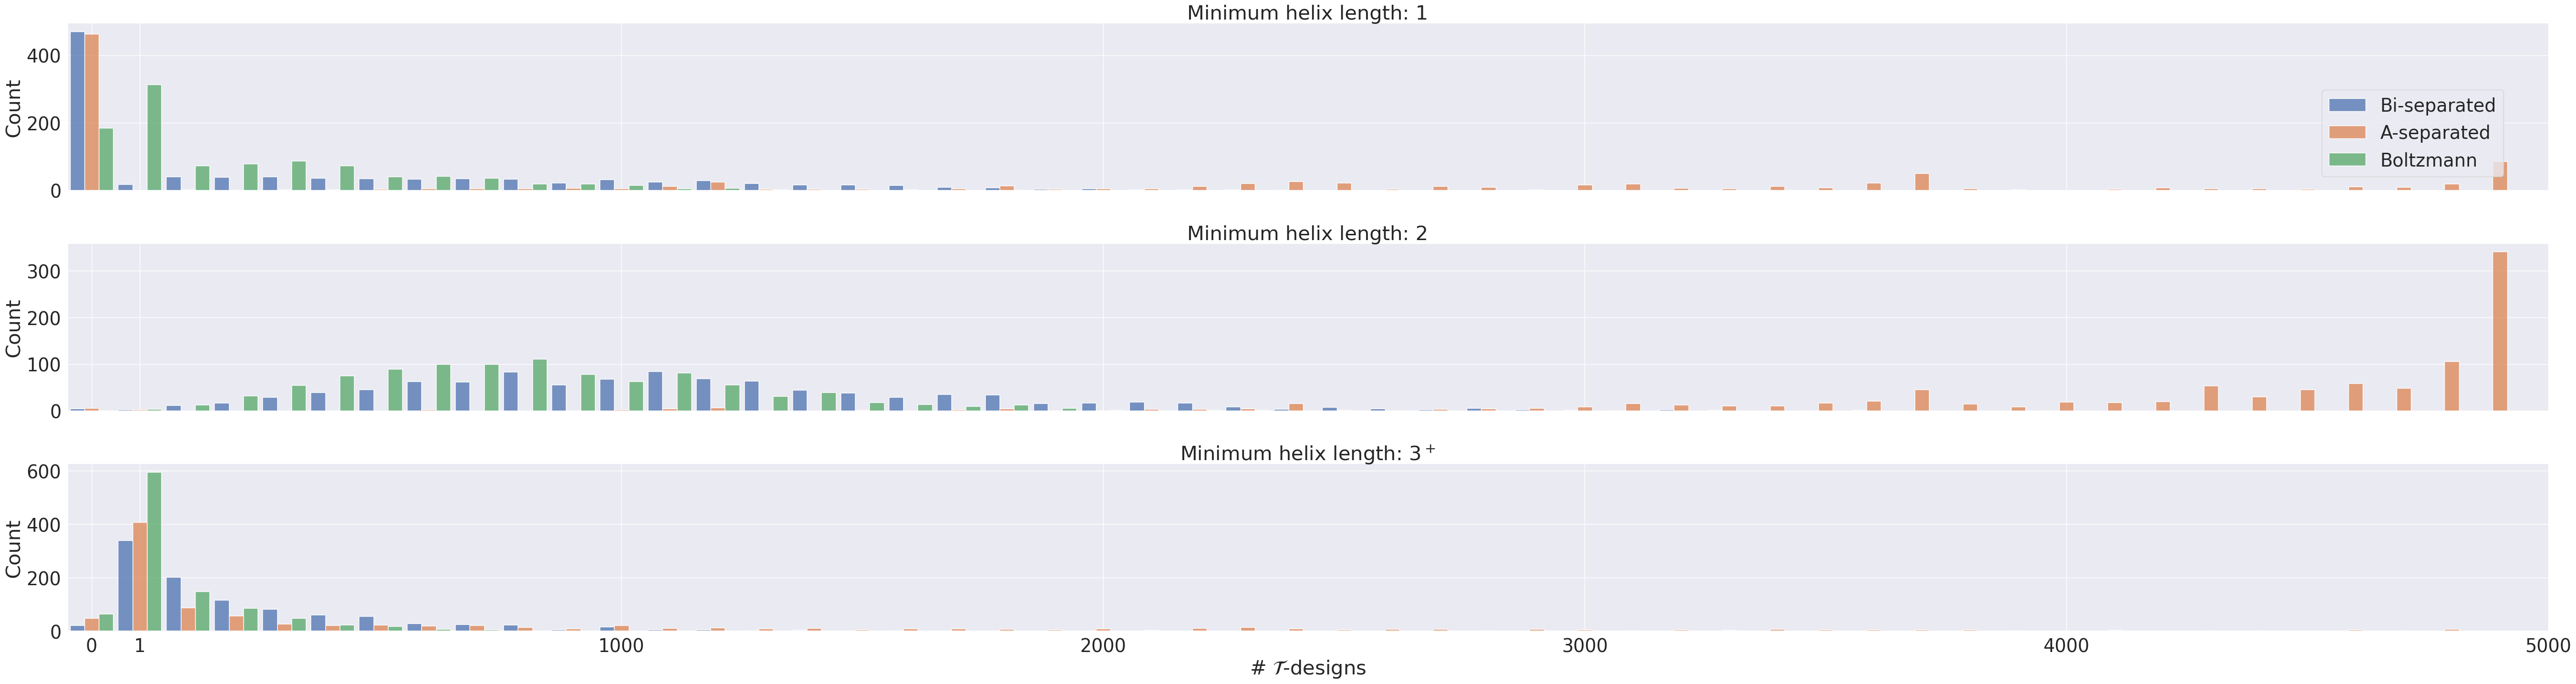

In [77]:
dfCount.loc[dfCount['unique']==0, 'unique'] = -100
sns.set(font_scale=2.5)
g = sns.displot(data=dfCount[dfCount['seed'].isin(['linearbp', 'linearbp_onlyA', 'bpenergy'])], x='unique', hue='seed', row='Min Helix',
                hue_order=['linearbp', 'linearbp_onlyA', 'bpenergy'],  multiple="dodge", shrink=0.9,
                binwidth=100, palette=sns.color_palette()[:3], aspect=10, facet_kws={'sharey': False})
new_labels = ['Bi-separated', 'A-separated', 'Boltzmann']
for i in range(3):
    g.axes[i,0].set_title(f"Minimum helix length: {i+1}{'$^+$' if i == 2 else ''}")

g._legend.set_title("")
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(g, "center right", bbox_to_anchor=(.978, .79),frameon=True)
plt.tight_layout()
plt.xlabel('# $\mathcal{T}$-designs')
# xlabels = ['3-biseparable LinearBPDesign', 'Min-separable LinearBPDesign', 'Base pair Energy']
# for i, ax in enumerate(g.axes[-1]):
#     ax.set_xlabel(f'# Directed solutions by {xlabels[i]}')
plt.xlim(-100, 5000)
plt.xticks([x+50 for x in [-100,0,1000,2000,3000,4000,5000]],[0,1,1000,2000,3000,4000,5000])
plt.savefig('../img/immediate_solution_dist.pdf', dpi=200, bbox_inches='tight')